# How big is my DataFrame?
A DataFrame of daily weather data from The Weather Underground is provided for you as df. Your job is to determine the exact amount of memory used (in kilobytes) to store the DataFrame in entirety.

You can use either `df.info()` or `df.memory_usage()` to determine this value. Remember that `df.memory_usage()` will return memory usage in bytes and the value must be divided by 1024 to convert to kilobytes (KB). This DataFrame has at least one column of text.

In [2]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/40. Parallel Programming with Dask/weather/ATL.csv')
df

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2016-01-01,46,43,39,38,33,27,82,68,53,...,10,10,10,22,13,25.0,0.00,8,NaN,320
1,2016-01-02,47,41,35,29,26,25,70,58,45,...,10,10,10,18,10,24.0,0.00,6,NaN,315
2,2016-01-03,53,44,35,29,27,25,70,53,35,...,10,10,10,17,10,23.0,0.00,6,NaN,310
3,2016-01-04,45,39,32,27,23,15,70,55,40,...,10,10,10,22,14,30.0,0.00,1,NaN,339
4,2016-01-05,44,35,26,17,14,12,58,44,29,...,10,10,10,18,10,24.0,0.00,1,NaN,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016-12-27,72,64,55,63,59,54,100,84,68,...,10,6,0,17,7,24.0,0.01,6,Fog-Rain,258
362,2016-12-28,67,57,47,58,47,36,96,68,39,...,10,10,10,14,6,18.0,0.00,7,NaN,259
363,2016-12-29,66,55,43,64,44,12,100,61,21,...,10,9,1,32,17,42.0,0.64,5,Rain-Thunderstorm,283
364,2016-12-30,51,43,35,21,17,12,52,37,21,...,10,10,10,21,12,28.0,0.00,1,NaN,297


In [3]:
df.memory_usage()

Index                         128
Date                         2928
Max TemperatureF             2928
Mean TemperatureF            2928
Min TemperatureF             2928
Max Dew PointF               2928
MeanDew PointF               2928
Min DewpointF                2928
Max Humidity                 2928
Mean Humidity                2928
Min Humidity                 2928
Max Sea Level PressureIn     2928
Mean Sea Level PressureIn    2928
Min Sea Level PressureIn     2928
Max VisibilityMiles          2928
Mean VisibilityMiles         2928
Min VisibilityMiles          2928
Max Wind SpeedMPH            2928
Mean Wind SpeedMPH           2928
Max Gust SpeedMPH            2928
PrecipitationIn              2928
CloudCover                   2928
Events                       2928
WindDirDegrees               2928
dtype: int64

# Filtering WDI data in chunks
Using the World Bank's World Development Indicators (or WDI) dataset, you're going to plot the percentage of the population of Australia in urban centers since 1980.

Your job is to loop over chunks of the WDI dataset; from each chunk, you will filter out rows describing Australia's "percent urban population." You'll then concatenate the filtered chunks and plot the results.

In [4]:
# Create empty list: dfs
dfs = []

# Loop over 'WDI.csv'
for chunk in pd.read_csv('../data/40. Parallel Programming with Dask/WDI.csv', chunksize=1000):
    # Create the first Series
    is_urban = chunk['Indicator Name']=='Urban population (% of total)'
    # Create the second Series
    is_AUS = chunk['Country Code']=='AUS'

    # Create the filtered chunk: filtered
    filtered = chunk.loc[is_urban & is_AUS]

    # Append the filtered chunk to the list dfs
    dfs.append(filtered)

In [5]:
df = pd.concat(dfs)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value,Region
875,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1980,85.76,East Asia & Pacific
950,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1981,85.70,East Asia & Pacific
1026,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1982,85.64,East Asia & Pacific
1101,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1983,85.58,East Asia & Pacific
1176,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1984,85.52,East Asia & Pacific


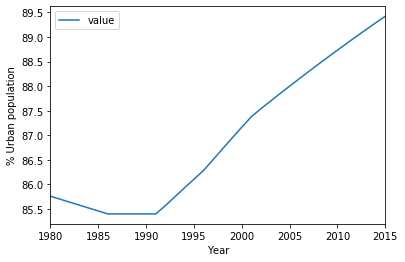

In [6]:
df.plot.line(x='Year', y='value')
plt.ylabel('% Urban population')

# Call plt.show()
plt.show()

## Computing percentage of delayed flights
Multiple CSV files of flight information have been provided from the Bureau of Transportation Statistics. Each file contains one month of information in 2016.

Your first job is to build a function to compute the percentage of delayed flights given a DataFrame of flight information. Your function will take a single DataFrame as input and compute the percentage of its rows in which the `'DEP_DELAY'` value is greater than zero.

In [7]:
# Define function with single input called df: pct_delayed
def pct_delayed(df):
    # Compute number of delayed flights: n_delayed
    n_delayed = (df['DEP_DELAY']>0).sum()
    # Return percentage of delayed flights
    return n_delayed  * 100 / len(df)

## Generating & plotting delayed flights
Now that you have a function to compute flight delays, you'll apply it with a generator to analyze the percentage of delayed flights for each month of 2016.

You'll create a generator expression to loop over the provided list filenames and return a sequence of DataFrames. For each DataFrame, you'll then apply the function `pct_delayed()` (provided for you) within a list comprehension. Finally, you'll plot the results.

In [8]:
filenames = ['flightdelays-2016-1.csv','flightdelays-2016-2.csv',
             'flightdelays-2016-3.csv','flightdelays-2016-4.csv',
             'flightdelays-2016-5.csv']

In [16]:
# Define the generator: dataframes
dataframes = (pd.read_csv('../data/40. Parallel Programming with Dask/flights/'+file) for file in filenames)

# Create the list comprehension: monthly_delayed
monthly_delayed = [pct_delayed(df) for df in dataframes]

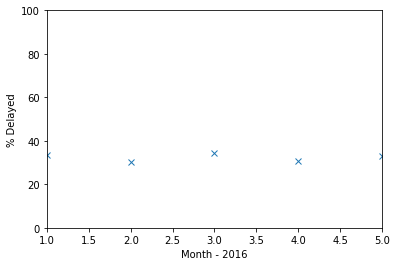

In [10]:
# Create the plot
x = range(1,6)
plt.plot(x, monthly_delayed, marker='x', linewidth=0)
plt.ylabel('% Delayed')
plt.xlabel('Month - 2016')
plt.xlim((1,5))
plt.ylim((0,100))
plt.show()

# Building a pipeline with delayed
If we use dask.delayed, we don't need to use generators; the dask scheduler will manage memory usage. In this version of the flight delay analysis, you'll compute the total yearly percentage of delayed flights.

Along with pandas, the decorator function delayed has been imported for you from dask, and the following decorated function, which calls `pd.read_csv()` on a single file, has been created for you:

`@delayed
def read_one(filename):
    return pd.read_csv(filename)`
    
Your job is to define three decorated functions to complete the pipeline: a function to total the number of flights, a function to count the number of delayed flights, and a function to aggregate the results.

In [11]:
from dask import delayed

In [12]:
# Define count_flights
@delayed
def count_flights(df):
    return len(df)

# Define count_delayed
@delayed
def count_delayed(df):
    return (df['DEP_DELAY']>0).sum()

# Define pct_delayed
@delayed
def pct_delayed(n_delayed, n_flights):
    return 100 * sum(n_delayed) / sum(n_flights)

@delayed
def read_one(filename):
    return pd.read_csv(filename)

## Computing pipelined results
Now that the `dask.delayed` functions are defined, we can use them to construct the pipeline of delayed tasks.

Your job is to loop over the file names, store the temporary information in lists, and aggregate the final result. Two empty lists, `n_delayed`, and `n_flights`, have been created for you.

The distinction here is that we are working with `dask.delayed` functions and objects, not real, computed values. The computation will only be executed when you call `.compute()` on the final result (by contrast with earlier exercises).

In [17]:
n_delayed = []
n_flights = []

# Loop over the provided filenames list and call read_one: df
for file in filenames:
    df = read_one('../data/40. Parallel Programming with Dask/flights/'+file)

    # Append to n_delayed and n_flights
    n_delayed.append(count_delayed(df))
    n_flights.append(count_flights(df))

# Call pct_delayed with n_delayed and n_flights: result
result = pct_delayed(n_delayed, n_flights)

# Print the output of result.compute()
print(result.compute())

32.406252934201824


# Inspecting a Dask array
A `dask.array` called energy is provided for you. The array energy contains electricity load in kWh in Texas sampled every 15 minutes for the year 2000. This dataset was provided by ERCOT.

Your job is to determine the correct shape of the array energy and the total electricity (in kWh) consumed by Texas for the year 2000 (i.e., the sum of the electricity load). Remember to leverage both the `.sum()` and `.compute()` methods.

In [33]:
from dask import array as da

In [31]:
energy = h5py.File('../data/40. Parallel Programming with Dask/Texas/texas.2000.hdf5', 'r')
energy = energy['load'].value
energy

array([5282.56, 5267.62, 5252.65, ..., 5136.65, 5138.3 , 5139.89])

## Chunking a NumPy array
A NumPy array has been provided for you as energy. This is the electricity load in kWh for the state of Texas sampled every 15 minutes over the year 2000 (that's about 35 thousand samples).

Your job is to convert the NumPy array into a `dask.array`; the `dask.array` should have chunks whose sizes are `1/4` of the number of elements of the array energy. You will then inspect the chunk sizes of the Dask array. Finally, you'll compute the mean electricity load in kWh in two ways (using the `dask.array` and using the `NumPy` array) to compare the results.

In [34]:
# Call da.from_array():  energy_dask
energy_dask = da.from_array(energy, chunks=energy.shape[0]//4)

In [35]:
# Print energy_dask.chunks
energy_dask.chunks

((8784, 8784, 8784, 8784),)

In [37]:
# Print Dask array average and then NumPy array average
%timeit energy_dask.mean().compute()

3.96 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%timeit energy.mean()

33 µs ± 3.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Using Dask DataFrames

### Inspecting a large DataFrame
A Dask DataFrame is provided for you called `df`. This DataFrame connects to the World Development Indicators data set you worked with earlier.

Your job is to inspect this Dask DataFrame using methods and correctly identify the number of columns, the number of rows, and the number of unique countries from either the Country Name or Country Code columns. You can use methods you are already familiar with such as `.describe()` and `.info()`. Remember to also use `.compute()`, since `df` is a Dask (and not pandas) DataFrame.

Dask accepts a wildcard `*` for all the files in a folder:

`transactions = dd.read_csv('*.csv')`

In [3]:
import dask.dataframe as dd

In [2]:
df = dd.read_csv('../data/40. Parallel Programming with Dask/WDI.csv')

In [3]:
df.compute().describe()

,Year,value
count,91048.000000,9.104800e+04
mean,1997.684990,1.960543e+06
std,10.280207,3.217680e+07
min,1980.000000,-2.071094e+02
25%,1989.000000,3.997965e+00
50%,1998.000000,1.042156e+01
75%,2007.000000,7.168516e+01
max,2016.000000,1.371220e+09


In [4]:
df.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91048 entries, 0 to 91047
Data columns (total 7 columns):
Country Name      91048 non-null object
Country Code      91048 non-null object
Indicator Name    91048 non-null object
Indicator Code    91048 non-null object
Year              91048 non-null int64
value             91048 non-null float64
Region            91048 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 4.9+ MB


### Building a pipeline of delayed tasks
For this exercise, you'll use a Dask DataFrame to read and process the World Bank's World Development Indicators.

Your job is to filter the DataFrame for the 'East Asia & Pacific' region and measurements of the percent population exposed to toxic air pollution. The output of this effort is a delayed Dask DataFrame; you'll compute the result in the next exercise.

In [5]:
# Boolean series where 'Indicator Code' is 'SP.URB.TOTL': toxins
toxins = df['Indicator Code'] == 'SP.URB.TOTL'

# Boolean series where 'Region' is 'East Asia & Pacific': region
region = df['Region'] == 'East Asia & Pacific'

# Filter the DataFrame using toxins & region: filtered
filtered = df.loc[toxins & region]
filtered.compute()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value,Region
18,American Samoa,ASM,Urban population,SP.URB.TOTL,1980,24125.0,East Asia & Pacific
39,American Samoa,ASM,Urban population,SP.URB.TOTL,1981,25130.0,East Asia & Pacific
60,American Samoa,ASM,Urban population,SP.URB.TOTL,1982,26313.0,East Asia & Pacific
81,American Samoa,ASM,Urban population,SP.URB.TOTL,1983,27641.0,East Asia & Pacific
102,American Samoa,ASM,Urban population,SP.URB.TOTL,1984,29058.0,East Asia & Pacific
...,...,...,...,...,...,...,...
90730,Vietnam,VNM,Urban population,SP.URB.TOTL,2011,27262172.0,East Asia & Pacific
90813,Vietnam,VNM,Urban population,SP.URB.TOTL,2012,28124097.0,East Asia & Pacific
90894,Vietnam,VNM,Urban population,SP.URB.TOTL,2013,29000397.0,East Asia & Pacific
90977,Vietnam,VNM,Urban population,SP.URB.TOTL,2014,29896080.0,East Asia & Pacific


### Grouping & aggregating by year
The filtered Dask DataFrame from the previous exercise has been provided for you as `filtered`. In this exercise you're going to plot the average percent of the population exposed to air pollution in the East Asia & Pacific region from 2010 to 2015.

Your job is to use `.groupby()` to collect all of the individual country values by the `'Year'` column and aggregate with the `mean()` function. You'll then call `.compute()` to perform the computation in parallel, and finally plot the results.

In [6]:
# Grouby filtered by the 'Year' column: yearly
yearly = filtered.groupby('Year')

# Calculate the mean of yearly: yearly_mean
yearly_mean = yearly.mean()

# Call .compute() to perform the computation: result
result = yearly_mean.compute()

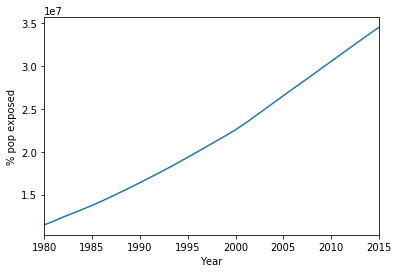

In [9]:
# Plot the 'value' column with .plot.line()
result['value'].plot.line()
plt.ylabel('% pop exposed')
plt.show()

# Reading & counting
The `sotu/` directory contains text files for each of the 45 US Presidents as of 2017. These text files contain the State of the Union addresses delivered by each president. The texts of the speeches were obtained from the American Presidency Project.

The entire speech for each State of the Union address is on a single line in each text file; that is, individual addresses are separated by `'\n'`. For example, the 33rd US president Truman delivered 9 State of the Union speeches, so the file `sotu/33Truman.txt` has 9 lines). Distinct files, then have distinct numbers of lines according to the number of State of the Union addresses each president delivered during their presidency.

In [5]:
import glob
from dask import bag as db

The `glob` module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde expansion is done, but `*`, `?`, and character ranges expressed with `[]` will be correctly matched. 

In [27]:
# Glob filenames matching 'sotu/*.txt' and sort
filenames = glob.glob('../data/40. Parallel Programming with Dask/sotu/*.txt')
filenames = sorted(filenames)

# Load filenames as Dask bag with db.read_text(): speeches
speeches = db.read_text(filenames)

# Print number of speeches with .count()
print(speeches.count().compute())

237


## Taking one element
Let's start using data from the Dask bag speeches of State of the Union addresses. For large datasets, the `.take()` method is useful for inspecting data & data types while processing dask bags. The value returned by `.take(n)` is a tuple of the first n elements of the `dask.bag`.

The speeches bag from the previous exercise is provided for you. Your task is to extract the first element of the bag using `.take()`, to determine its datatype, and to print the words of the first speech.

In [28]:
# Call .take(1): one_element
one_element = speeches.take(1)

# Extract first element of one_element: first_speech
first_speech = one_element[0]

# Print type of first_speech and first 60 characters
print(type(first_speech))
print(first_speech[:60])

<class 'str'>
 Fellow-Citizens of the Senate and House of Representatives:


### Splitting by word & count
Using the speeches bag from earlier exercises let's examine some statistics about the State of the Union addresses.

Your job is to split each speech into a list of words using a single space `' '` as the separator. At this point the Dask Bag can be considered a list-of-lists. You'll then map the `len()` function over each of the inner lists to compute the number of words in each speech and then compute the `mean()` of the lengths to get the average word count.

In [29]:
# Call .str.split(' ') from speeches and assign it to by_word
by_word = speeches.str.split(' ')

# Map the len function over by_word and compute its mean
n_words = by_word.map(len)
avg_words = n_words.mean()

# Print the type of avg_words and value of avg_words.compute()
print(type(avg_words))
print(avg_words.compute())

<class 'dask.bag.core.Item'>
8239.084388185654


### Filtering on a phrase
In this exercise you'll make use of the filter function to take the 226 State of the Union addresses and find the addresses where the phrase health care was mentioned. In order to do this you must first standardize the capitalization of all words in each speech.

Your job is to convert all speeches to lower case and write a lambda function that returns true if the substring `'health care'` is contained in each speech and filter with it. Finally, you'll count the number of speeches retained by the filter.

In [31]:
# Convert speeches to lower case: lower
lower = speeches.str.lower()

# Filter lower for the presence of 'health care': health
health = lower.filter(lambda s:'health care' in s)

# Count the number of entries : n_health
n_health = health.count()

# Compute and print the value of n_health
print(n_health.compute())

47


# Loading & mapping from JSON
A collection of JSON files for Congressional bills have been downloaded from GovTrack.us. All bills presented during each congressional session from 1973 - 2017 are provided in separate files.

Your job is to read the `bills*.json` files into a Dask Bag. You'll then use the JSON module to map the text of each file into Python dictionaries. You'll then inspect the first element of the Dask Bag.

In [1]:
import json

In [6]:
# Call db.read_text with congress/bills*.json: bills_text
bills_text = db.read_text('../data/40. Parallel Programming with Dask/congress/bills*.json')

# Map the json.loads function over all elements: bills_dicts
bills_dicts = bills_text.map(json.loads)

In [7]:
# Extract the first element with .take(1) and index to the first position: first_bill
first_bill = bills_dicts.take(1)[0]

# Print the keys of first_bill
print(first_bill.keys())

dict_keys(['bill_resolution_type', 'bill_type', 'bill_type_label', 'committee_reports', 'congress', 'current_chamber', 'current_status', 'current_status_date', 'current_status_description', 'current_status_label', 'display_number', 'docs_house_gov_postdate', 'id', 'introduced_date', 'is_alive', 'is_current', 'link', 'lock_title', 'major_actions', 'noun', 'number', 'related_bills', 'scheduled_consideration_date', 'senate_floor_schedule_postdate', 'sliplawnum', 'sliplawpubpriv', 'source', 'source_link', 'sponsor', 'sponsor_role', 'text_incorporation', 'title', 'title_without_number', 'titles'])


# Filtering vetoed bills
Now that you've got a Dask Bag prepared with congressional bills as dictionaries we can use filtering and mapping tools to find all of the bills since the 93rd congress that were vetoed by the sitting President and later overridden by congress.

The `bills_dicts` Dask Bag from the previous exercise is provided for you. Your job is to filter the bills to retain those where the `current_status` key is `'enacted_veto_override'`. You'll then print the titles of the bills using `.pluck`.

In [9]:
def veto_override(d):
    return d['current_status'] == 'enacted_veto_override'

In [11]:
# Filter the bills: overridden
overridden = bills_dicts.filter(veto_override)

# Print the number of bills retained
print(overridden.count().compute())

# Get the value of the 'title' key
titles = overridden.pluck('title')

# Compute and print the titles
titles.compute()

3


['H.R. 12471 (93rd): A bill to amend section 552 of title 5, United States Code, known as the Freedom of Information Act.',
 'H.R. 6198 (97th): A bill to amend the manufacturing clause of the copyright law.',
 'H.R. 6863 (97th): Supplemental Appropriations Act, 1982']

# Computing the average bill's lifespan
Some congressional bills can take years to get through committees, floor reading, voting and presidential signatures.

Each bill in the `bills_dicts` Dask Bag has `'current_status_date'` and `'introduced_date'` keys. Your job is to write a function that returns the number of days that have passed between these two dates. You'll then apply this function over the bills where the `'current_status'` is `'enacted_signed'`. Finally, you'll compute the average number of days. 

In [12]:
# Define a function lifespan that takes a dictionary d as input
def lifespan(d):
    # Convert to datetime
    current = pd.to_datetime(d['current_status_date'])
    intro = pd.to_datetime(d['introduced_date'])

    # Return the number of days
    return (current - intro).days

In [13]:
# Filter bills_dicts: days
days = bills_dicts.filter(lambda s:s['current_status']=='enacted_signed').map(lifespan)

# Print the mean value of the days Bag
print(days.mean().compute())

228.03521703521704
